<a href="https://colab.research.google.com/github/srishagorasa1/BreastCancer/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project: Breast cancer detection**

**Step 1: Installation and Setup**

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.4.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Step 2: Data Preprocessing**

In [4]:
from sklearn import datasets, metrics

In [5]:
# import the dataset
cancer = datasets.load_breast_cancer()

In [6]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
# matrix of features
x = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)

In [8]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# dependent variable
y = cancer.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [10]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
x.shape, y.shape

((569, 30), (569,))

In [12]:
# splitting the dataset in train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [14]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [16]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [17]:
x_train = x_train.reshape(455, 30, 1)
x_test = x_test.reshape(114, 30, 1)

In [18]:
x_train.shape, x_test.shape

((455, 30, 1), (114, 30, 1))

**Step 3: Building the model**

In [19]:
# define an object
model = tf.keras.models.Sequential()

In [20]:
# First CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (30, 1)))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [21]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [22]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [23]:
# dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [25]:
# compile model

opt = tf.keras.optimizers.Adam(learning_rate=0.00005)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

**Step 4: Training the model**

In [26]:
history =  model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
15/15 [==============================] - 2s 47ms/step - loss: 0.8569 - accuracy: 0.5687 - val_loss: 0.6344 - val_accuracy: 0.8158
Epoch 2/50
15/15 [==============================] - 0s 10ms/step - loss: 0.5238 - accuracy: 0.7292 - val_loss: 0.5880 - val_accuracy: 0.9123
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 0.3889 - accuracy: 0.8425 - val_loss: 0.5463 - val_accuracy: 0.9211
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 0.2811 - accuracy: 0.9033 - val_loss: 0.5123 - val_accuracy: 0.8684
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 0.2229 - accuracy: 0.9206 - val_loss: 0.4817 - val_accuracy: 0.8333
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 0.2429 - accuracy: 0.9061 - val_loss: 0.4549 - val_accuracy: 0.8246
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.1987 - accuracy: 0.9329 - val_loss: 0.4298 - val_accuracy: 0.8246
Epoch 8/50
15/

**Step 5: Model Prediction**

In [28]:
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
# predictions

print(y_pred[:30]), print(y_test[:30])

[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0]


(None, None)

In [30]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [31]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[44  3]
 [ 0 67]]


In [32]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9736842105263158


**Step 6 : Learning curve**

In [33]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

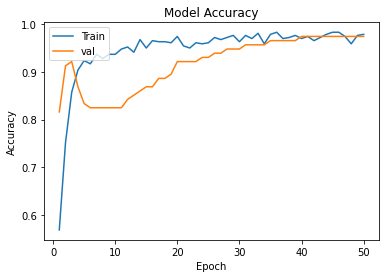

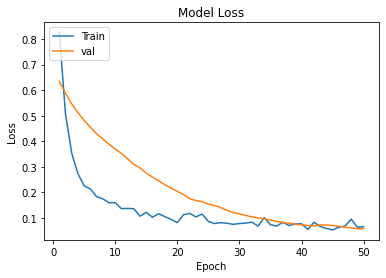

In [34]:
learning_curve(history, 50)